In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [3]:
def print_bovers(selections):
    scale =ak.sum(selections[0]["scale"])/ak.sum(selections[1]["scale"])
    print(f"QCD/Signal: {scale:0.2f}")
    for selection in selections:print(selection)
    print("------")

In [4]:
trees = [ Tree(fnames) for fnames in [fc.QCD_B_List,fc.NMSSM_MX_700_MY_400] ]

In [5]:
print(trees[1])

=== File Info ===
File: ['/eos/uscms/store/user/ekoenig/6BAnalysis/NTuples/2018/Selection/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root']
Total Events:    [484003.0]
Raw Events:      [96675]
Selected Events: 96675


In [6]:
for tree in trees: tree.calc_event_shapes()

In [7]:
selections = [ Selection(tree) for tree in trees ]
selections_btagwp = [ Selection(tree,mask=ak.sum(tree["jet_btag"]>jet_btagWP[mediumWP],axis=-1)==4) for tree in trees ]
selections_btagsum = [ Selection(tree,mask=ak.sum(tree["jet_btag"][:,:6],axis=-1)<4) for tree in trees ]
selections_sphericity=[ Selection(tree,mask=tree["event_St"] < 0.25) for tree in trees ]
selections_thrust = [ Selection(tree,mask=tree["event_Tm"] < 0.35) for tree in trees ]

In [8]:
print_bovers(selections)
print_bovers(selections_btagwp)
print_bovers(selections_btagsum)
print_bovers(selections_sphericity)
print_bovers(selections_thrust)

QCD/Signal: 6.85
--- all QCD ---
Event Efficiency:   1.0
--- all Signal ---
Event Efficiency:   1.0
Selected Purity(6): 0.48
Passed Jet S/T:     0.86
------
QCD/Signal: 24.53
--- all QCD ---
Event Efficiency:   0.61
--- all Signal ---
Event Efficiency:   0.18
Selected Purity(6): 0.28
Passed Jet S/T:     0.81
------
QCD/Signal: 23.22
--- all QCD ---
Event Efficiency:   0.67
--- all Signal ---
Event Efficiency:   0.2
Selected Purity(6): 0.30
Passed Jet S/T:     0.82
------
QCD/Signal: 21.86
--- all QCD ---
Event Efficiency:   0.48
--- all Signal ---
Event Efficiency:   0.13
Selected Purity(6): 0.32
Passed Jet S/T:     0.81
------
QCD/Signal: 15.35
--- all QCD ---
Event Efficiency:   0.55
--- all Signal ---
Event Efficiency:   0.21
Selected Purity(6): 0.38
Passed Jet S/T:     0.83
------


In [11]:
cuts_merged = [ s1.masked(s2.mask) for s1,s2 in zip(selections_btagwp,selections_sphericity) ]

In [12]:
print_bovers(cuts_merged)

QCD/Signal: 66.05
--- all QCD ---
Event Efficiency:   0.31
--- all Signal ---
Event Efficiency:   0.029
Selected Purity(6): 0.15
Passed Jet S/T:     0.77
------


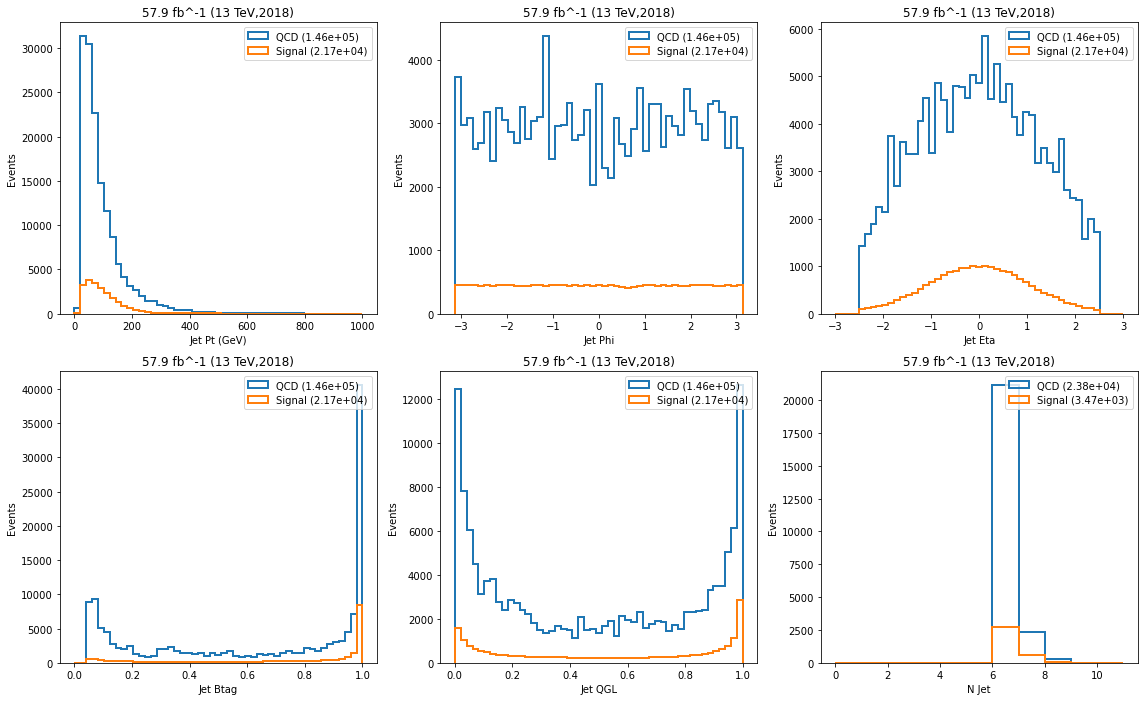

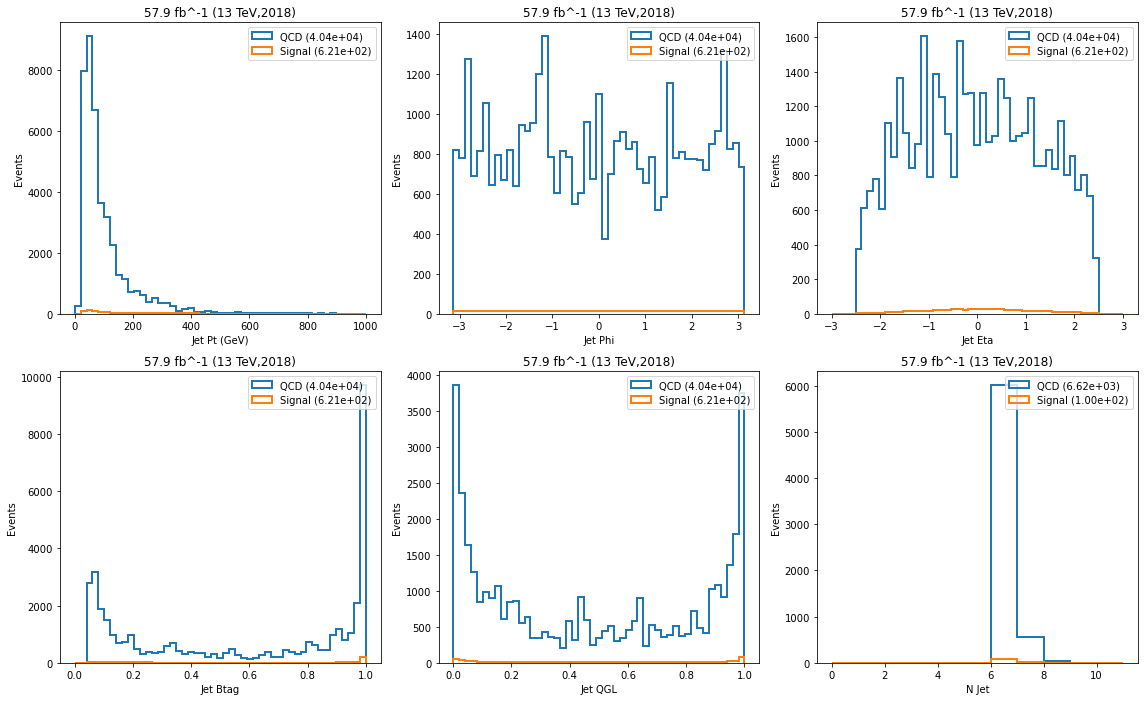

In [14]:
study.jets(selections,saveas="baseline")

study.jets(cuts_merged,saveas="btag_shape_cr")

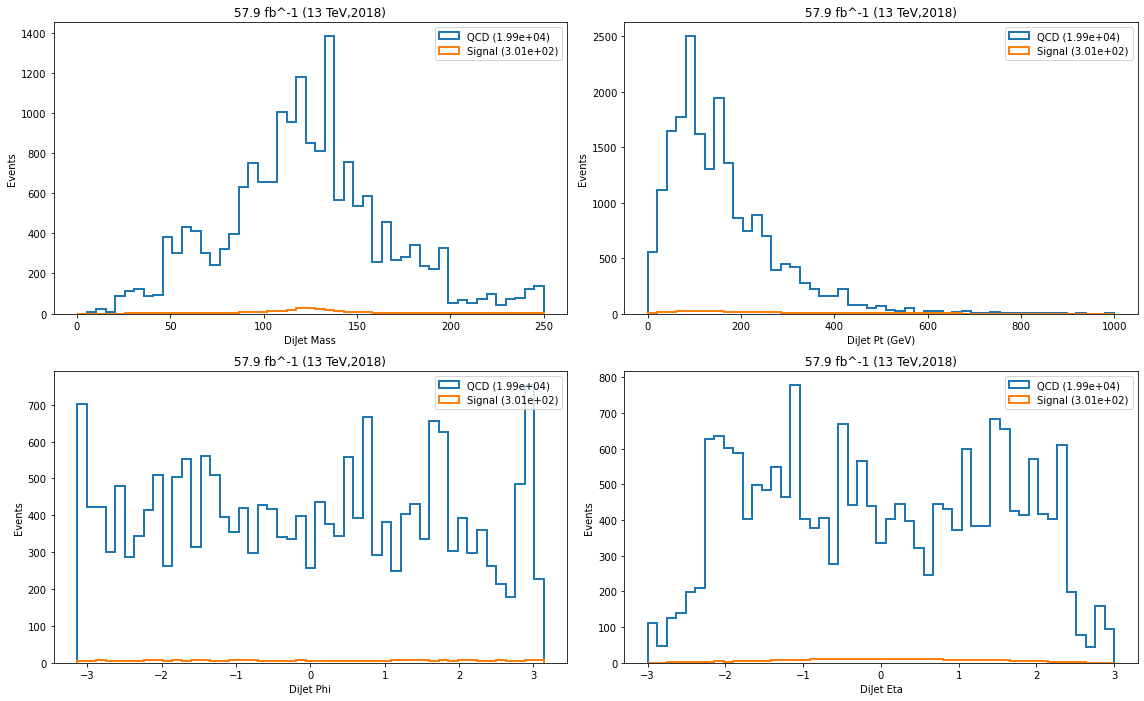

In [12]:
study.higgs(cuts_merged,saveas="btag_shape_cr")